In [8]:
# import dependencies
# import sys
# !{sys.executable} -m pip install plotly
from PIL import Image
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import glacierml as gl
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import KMeans
import seaborn as sns
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_columns', None)

tf.random.set_seed(42)

        
# RGI.to_csv('Farinotti_mean_thickness_RGI_ID.csv')


In [2]:
predictions = gl.predictions_finder()
predictions = predictions.reset_index()
predictions = predictions.drop('index', axis = 1)
predictions

100%|██████████| 165/165 [00:01<00:00, 111.69it/s]


,architecture,epochs,learning rate,training module
0,50-28,100,0.1,7
1,24-12,100,0.1,1
2,64-48,100,0.1,2
3,59-28,100,0.1,3
4,64-36,100,0.1,4
5,50-25,100,0.1,5
6,60-30,100,0.01,9


In [3]:
idx = 6
training_module =  predictions['training module'].iloc[idx]
architecture = predictions['architecture'].iloc[idx]
learning_rate = predictions['learning rate'].iloc[idx]
epochs = predictions['epochs'].iloc[idx]
df_glob = gl.global_predictions_loader(
    training_module = training_module,
    architecture = architecture,
    learning_rate = learning_rate,
    epochs = epochs
    
)
# df_reg = gl.global_predictions_loader(
#     training_module = training_module,
#     architecture = architecture,
#     learning_rate = learning_rate,
#     epochs = epochs
    
# )

# gl.glathida_stats_adder(
#     df_reg,
# #     pth_1 = '/home/simonhans/data/prethicktor/regional_data/raw/',
# #     pth_2 = '/home/simonhans/data/prethicktor/RGI/rgi60-attribs/',
# #     pth_3 = '/home/simonhans/data/prethicktor/regional_data/training_data/',
# )
# df_reg

df_glob

100%|██████████| 165/165 [00:00<00:00, 514.42it/s] 


,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Zdelta,avg predicted thickness,predicted thickness std dev,volume km3
0,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,789,35.570675,5.493072,0.012805
1,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,431,28.619638,5.998455,0.015970
2,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,573,27.717684,5.074340,0.046704
3,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,1044,36.905530,5.706895,0.135849
4,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,823,38.426826,5.594325,0.098872
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216454,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,200,43.898700,12.589362,0.001844
216455,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,500,43.317978,13.649973,0.024561
216456,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,1100,73.833870,16.039192,0.304048
216457,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106,100,93.045166,17.093414,0.001023


In [4]:
ref = pd.read_csv('reference_thicknesses/Farinotti_mean_thickness_RGI_ID_2.csv')
ref = ref[[
    'RGIId',
    'Farinotti Mean Thickness'
]]
ref['region'] = ref['RGIId'].str[6:8]
ref = ref.sort_values('RGIId')
ref = ref.dropna()




RGI = gl.RGI_loader()

RGI = RGI[[
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Area',
    'Aspect',
    'Lmax'
]]
drops = RGI[

#     (RGI['Aspect'] < 0) | 
    (RGI['Zmin'] < 0) |
    (RGI['Zmax'] < 0) |
    (RGI['Lmax'] < 0) 

].index
RGI = RGI.drop(drops)
RGI['Zdelta'] = RGI['Zmax'] - RGI['Zmin']
RGI

ref = pd.merge(ref, RGI, left_index = True, right_index = True)

ref = pd.merge(ref, df_glob['avg predicted thickness'], left_index = True, right_index = True)
ref = ref.rename(columns = {
    'avg predicted thickness':'Edasi Mean Thickness'
})
ref = ref.reset_index()
ref = ref.drop('index', axis = 1)
ref['VE / VF'] = ref['Edasi Mean Thickness'] / ref['Farinotti Mean Thickness']
ref

,RGIId,Farinotti Mean Thickness,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Zdelta,Edasi Mean Thickness,VE / VF
0,RGI60-01.00001,21.182035,01,34.409484,77.146095,22.6,5196,5309,5595,0.409,31,972,399,24.940819,1.177452
1,RGI60-01.00002,30.519478,01,34.424095,77.157513,16.2,5183,5367,5591,1.042,348,1747,408,30.339058,0.994088
2,RGI60-01.00003,35.518610,01,34.430626,77.166964,14.5,5284,5427,5618,0.877,321,1506,334,31.808811,0.895553
3,RGI60-01.00004,53.077263,01,34.405011,77.088658,22.2,5097,5219,5543,0.216,359,974,446,25.454060,0.479566
4,RGI60-01.00005,47.519207,01,34.399000,77.125338,34.7,5236,5462,5595,0.193,357,506,359,29.044165,0.611209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209955,RGI60-19.02748,12.948014,19,34.541748,77.093400,20.3,5120,5451,5830,1.560,34,2628,710,47.984085,3.705903
209956,RGI60-19.02749,22.894110,19,34.561759,77.072246,29.3,5190,5473,5760,0.328,333,1120,570,27.399399,1.196788
209957,RGI60-19.02750,60.874610,19,34.565176,77.079956,30.2,5219,5485,5715,0.335,344,1136,496,22.873884,0.375754
209958,RGI60-19.02751,10.053704,19,34.418078,77.121849,20.5,5084,5329,5628,1.151,360,1799,544,44.924374,4.468440


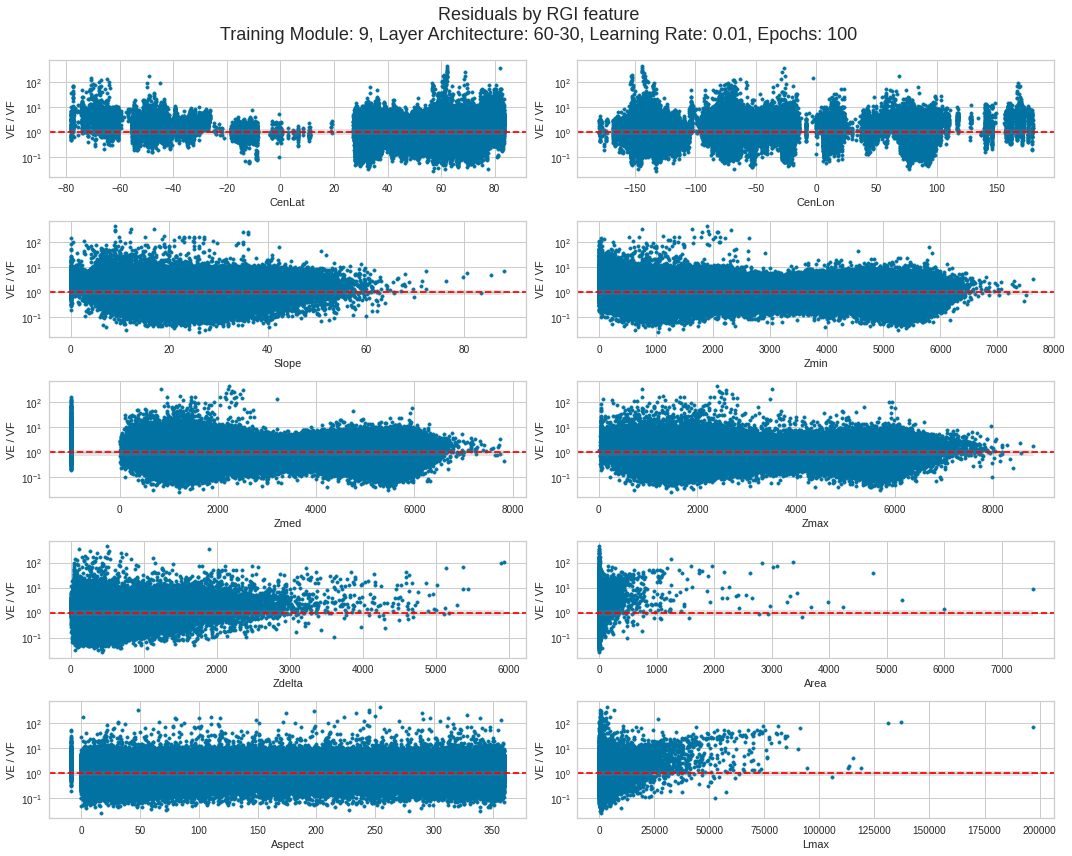

In [5]:
fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Residuals by RGI feature' + 
    '\nTraining Module: ' + predictions['training module'].loc[idx] + 
    ', Layer Architecture: ' + predictions['architecture'].loc[idx] +
    ', Learning Rate: ' + predictions['learning rate'].loc[idx] + 
    ', Epochs: ' + predictions['epochs'].loc[idx], fontsize=18, y=0.99)
fig.patch.set_facecolor('w')
dft = ref[[
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Zdelta',
    'Area',
    'Aspect',
    'Lmax',

]]
# for region_number in tqdm((range(1,20,1))):
#     if len(str(region_number)) == 1:
#         N = 1
#         region_number = str(region_number).zfill(N + len(str(region_number)))
#     else:
#         str(region_number) == str(region_number)
    



for n, variable in enumerate(dft):
    ax = plt.subplot(5, 2, n + 1)
    plt.subplots_adjust(hspace=0.5)
    ax.set_ylabel('VE / VF')
    ax.set_xlabel(variable)
    ax.set_yscale('log')
    plt.scatter(
        dft[variable],
        ref['VE / VF'],
        marker = '.'
    )
    ax.fill_between(
        x = (
            dft[variable].min(), dft[variable].max()
        ),
        y1 = 1.25,
        y2 = 0.75,
        facecolor = 'gray',
        alpha = 0.2
    )
    plt.axhline(y = 1.00, color = 'red', linestyle = '--')

plt.tight_layout()

/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resu

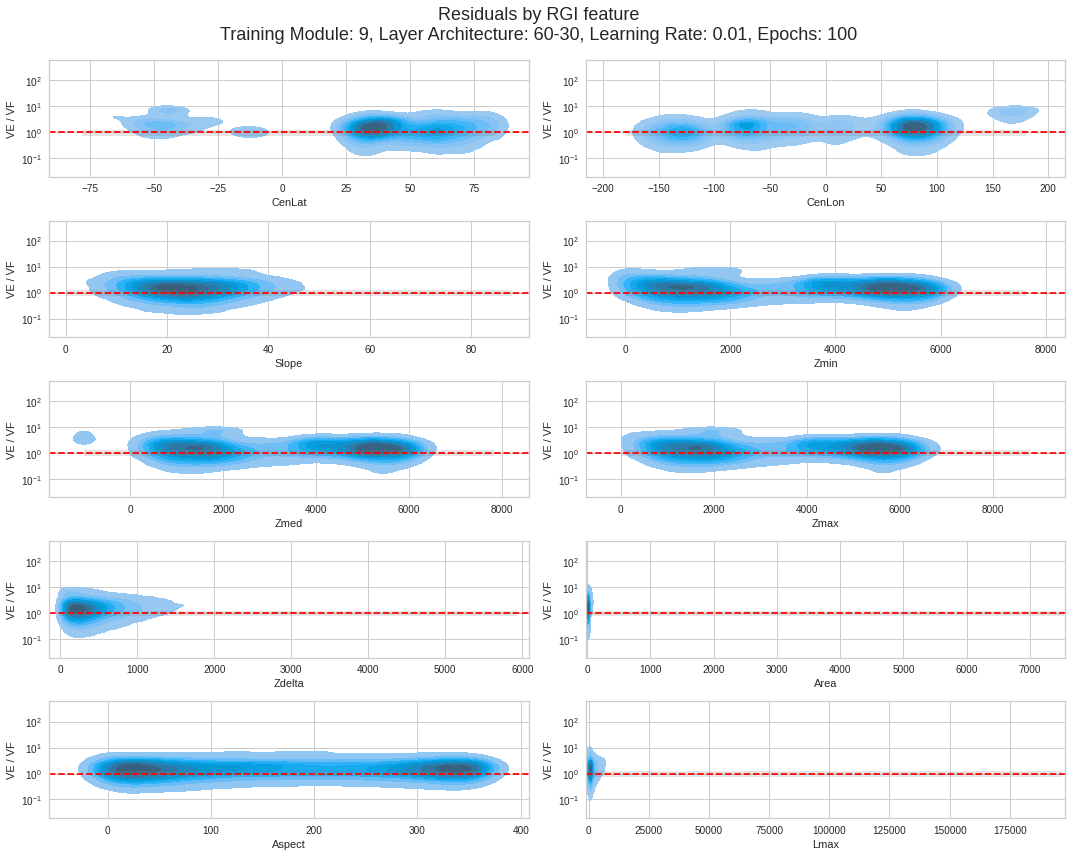

In [6]:
fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Residuals by RGI feature' + 
    '\nTraining Module: ' + predictions['training module'].loc[idx] + 
    ', Layer Architecture: ' + predictions['architecture'].loc[idx] +
    ', Learning Rate: ' + predictions['learning rate'].loc[idx] + 
    ', Epochs: ' + predictions['epochs'].loc[idx], fontsize=18, y=0.99)
fig.patch.set_facecolor('w')
dft = ref[[
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Zdelta',
    'Area',
    'Aspect',
    'Lmax',

]]
# for region_number in tqdm((range(1,20,1))):
#     if len(str(region_number)) == 1:
#         N = 1
#         region_number = str(region_number).zfill(N + len(str(region_number)))
#     else:
#         str(region_number) == str(region_number)
    



for n, variable in enumerate(dft):
    ax = plt.subplot(5, 2, n + 1)
    plt.subplots_adjust(hspace=0.5)
    ax.set_ylabel('VE / VF')
    ax.set_xlabel(variable)
    ax.set_yscale('log')
    sns.kdeplot(
        dft[variable],
        ref['VE / VF'],
        fill = True
    )
    ax.fill_between(
        x = (
            dft[variable].min(), dft[variable].max()
        ),
        y1 = 1.25,
        y2 = 0.75,
        facecolor = 'gray',
        alpha = 0.2
    )
    plt.axhline(y = 1.00, color = 'red', linestyle = '--')

plt.tight_layout()

In [ ]:
data_1 = ref['Farinotti Mean Thickness']
data_2 = ref['Edasi Mean Thickness']
#sort data


x_1 = np.sort(data_1)
# x = data_1
#calculate CDF values
y_1 = 1. * np.arange(len(data_1)) / (len(data_1) - 1)


x_2 = np.sort(data_2)
# x = data
#calculate CDF values
y_2 = 1. * np.arange(len(data_2)) / (len(data_2) - 1)

#plot CDF
fig, ax = plt.subplots(1,1,figsize=(25, 25))
plt.subplots_adjust(hspace=0.5)
plt.plot(x_1, y_1)
plt.plot(x_2, y_2)
ax.set_xscale('logtqdm')

In [ ]:
data = ref['Farinotti Mean Thickness']
#sort data


x = np.sort(data)
# x = data
#calculate CDF values
y = 1. * np.arange(len(data)) / (len(data) - 1)

#plot CDF
plt.plot(x, y)

In [ ]:
data = ref['Edasi Mean Thickness']
#sort data


x = np.sort(data)
# x = data
#calculate CDF values
y = 1. * np.arange(len(data)) / (len(data) - 1)

#plot CDF
plt.plot(x, y)

19it [00:00, 43.33it/s]


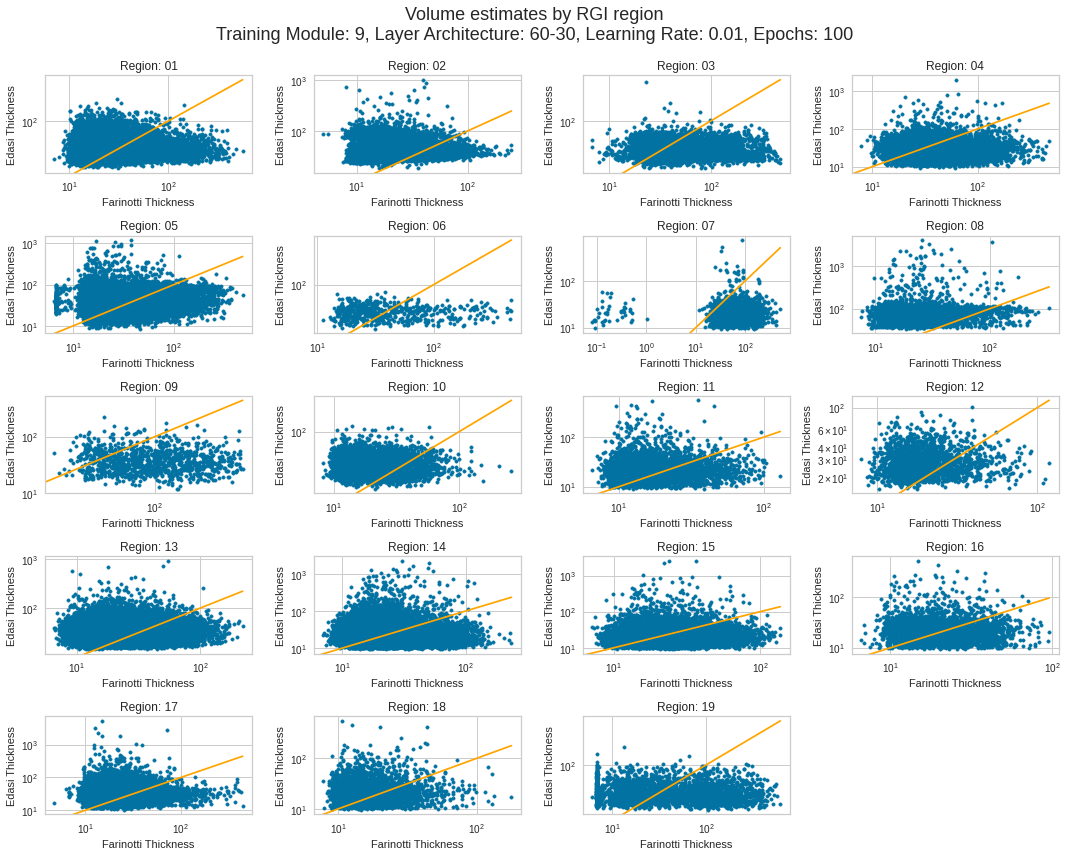

In [7]:
fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Volume estimates by RGI region' + 
    '\nTraining Module: ' + predictions['training module'].loc[idx] + 
    ', Layer Architecture: ' + predictions['architecture'].loc[idx] +
    ', Learning Rate: ' + predictions['learning rate'].loc[idx] + 
    ', Epochs: ' + predictions['epochs'].loc[idx], fontsize=18, y=0.99)
fig.patch.set_facecolor('w')

for n, region_number in tqdm(enumerate(range(1,20,1))):
    if len(str(region_number)) == 1:
        N = 1
        region_number = str(region_number).zfill(N + len(str(region_number)))
    else:
        str(region_number) == str(region_number)
    ax = plt.subplot(5, 4, n + 1)
    dft = ref[ref['region'] == str(region_number)]


    plt.subplots_adjust(hspace=0.5)

    plt.scatter(
        x = dft['Farinotti Mean Thickness'],
        y = dft['Edasi Mean Thickness'],
        marker = '.',
    )
    plt.plot(
        (0,(dft['Farinotti Mean Thickness'].max())),
        (0,(dft['Farinotti Mean Thickness'].max())),
        '-',
        c = 'orange'

    )
    ax.set_title('Region: ' + str(region_number))
    ax.set_ylabel('Edasi Thickness')
    ax.set_xlabel('Farinotti Thickness')
    ax.set_yscale('log')
    ax.set_xscale('log')
plt.tight_layout()